In [62]:
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv('/content/81-90.csv')

In [64]:
df['ratio'] = np.where(df['cit_2021'] == 0, 0, df['cit_2022'] / df['cit_2021'])
df['ratio'] = round(df['ratio'], 2)
# Assign categories based on the ratio
conditions = [
    df['ratio'] <= 1.05,
    (df['ratio'] >= 1.06) & (df['ratio'] <= 1.15),
    df['ratio'] > 1.15
]
choices = ['Low', 'Medium', 'High']
df['category'] = np.select(conditions, choices, default='Other')

# View the updated DataFrame
print(df[['univ_rank', 'first_initial', 'last_initial', 'ratio', 'category']])

    univ_rank first_initial last_initial  ratio category
0          81             S            G   0.99      Low
1          81             A            S   0.84      Low
2          81             B            A   1.67     High
3          81             J            H   1.08   Medium
4          81             P            J   0.92      Low
..        ...           ...          ...    ...      ...
95         90             A            A   0.95      Low
96         90             J            B   0.74      Low
97         90             W            D   1.17     High
98         90             A            K   1.17     High
99         90             D            L   2.77     High

[100 rows x 5 columns]


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Normalize the citation data from 2017 to 2022 using Min-Max scaling
scaler = MinMaxScaler()
df[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021', 'cit_2022']] = scaler.fit_transform(df[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021', 'cit_2022']])

# Convert categories to numerical values (Low: 0, Medium: 1, High: 2)
category_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['category_encoded'] = df['category'].map(category_mapping)
print(df)
# Split the data into training and test datasets (80% train, 20% test)
X = df[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021', 'cit_2022']]
y = df['category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)


    univ_rank first_initial last_initial  cit_2017  cit_2018  cit_2019  \
0          81             S            G  0.322380  0.225916  0.263554   
1          81             A            S  0.292185  0.165536  0.200301   
2          81             B            A  0.003552  0.013569  0.036145   
3          81             J            H  0.264654  0.189281  0.228163   
4          81             P            J  0.539964  0.447761  0.487952   
..        ...           ...          ...       ...       ...       ...   
95         90             A            A  1.000000  1.000000  0.990964   
96         90             J            B  0.100355  0.126187  0.125753   
97         90             W            D  0.000000  0.004749  0.004518   
98         90             A            K  0.126110  0.164179  0.191265   
99         90             D            L  0.000000  0.000000  0.007530   

    cit_2020  cit_2021  cit_2022  h_index  i_10_index  ratio category  \
0   0.260703  0.190445  0.174301      

In [66]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert the target data to categorical (one-hot encoding) with explicitly 3 classes
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the neural network
model = Sequential([
    Dense(6, input_dim=6, activation='relu'),  # Input layer
    Dense(6, activation='relu'),               # Hidden layer
    Dense(3, activation='softmax')             # Output layer
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train_cat, epochs=50, batch_size=10)

# Evaluate the model's accuracy on the test data
loss, accuracy = model.evaluate(X_test, y_test_cat)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))



Epoch 1/50
8/8 [==============================] - 1s 3ms/step - loss: 1.0921 - accuracy: 0.4000
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0852 - accuracy: 0.5250
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0780 - accuracy: 0.5125
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0726 - accuracy: 0.5125
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0657 - accuracy: 0.4875
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0587 - accuracy: 0.5125
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0513 - accuracy: 0.5000
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0419 - accuracy: 0.5375
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 1.0273 - accuracy: 0.6000
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0127 - accuracy: 0.5875
Epoch 11/50
8/8 [======================

1/1 [==============================] - 0s 58ms/step


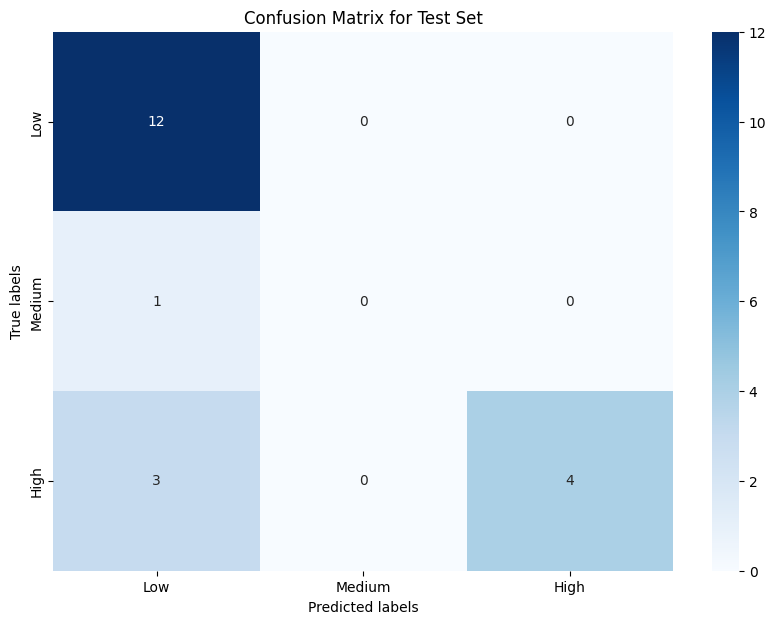

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Predict the categories for the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# 2. Convert one-hot encoded true labels back to their original form
y_true_labels = np.argmax(y_test_cat, axis=1)

# 3. Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# 4. Plot the confusion matrix using seaborn's heatmap function
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()
